## Problem 3

In [1]:
# Importing Libraries
import random
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Defining data splitting function
def dataSplit(data, split_at):
    np.random.shuffle(data)
    return data[:split_at,:] , data[split_at:,:]

In [3]:
# Creating the dataset as per the given conditions 
input_arr = []
for i in range(21):
    for j in range(21):
        x=-2+0.2*i
        y=-2+0.2*j
        input_arr.append([x,y])
input_np_array=np.array(input_arr)

# Randomly shuffling the dataset
random.shuffle(input_np_array)

# Splitting the dataset in train and test sets
train_count = round(input_np_array.shape[0]*0.8)
X_train , X_test = dataSplit(input_np_array, train_count)

# Creating the result array for the training set based on the given mapping function
output_arr=[]
for point in X_train:
    func=point[0]*point[0]+point[1]*point[1]
    if func<=1:
        output_arr.append(1)
    else:
        output_arr.append(-1)
        
y_train = np.array(output_arr)

# Creating the result array for the testing set based on the given mapping function
output_arr_test=[]
for point in X_test:
    func=point[0]*point[0]+point[1]*point[1]
    if func<=1:
        output_arr_test.append(1)
    else:
        output_arr_test.append(-1)
        
y_test = np.array(output_arr_test)

#### Functions

In [4]:
# This function will be used to get initial random weights.
def get_weights(center_shape):
    randomlist = []
    for i in range(center_shape):
        n = random.random()
        randomlist.append(n)
    return randomlist

# This function will be used to get random centers.
def random_centers(X_train, number_of_centers):
    number_of_rows = X_train.shape[0]
    random_indices = np.random.choice(number_of_rows, size=number_of_centers, replace=False)
    random_rows = X_train[random_indices, :]
    return random_rows

# This function will calculate the testing accuracy between expected and obtained values
def accuracy(y_true, y_pred):
    if not (len(y_true) == len(y_pred)):
        print('Size of predicted and true labels not equal.')
        return 0.0

    corr = 0
    for i in range(0,len(y_true)):
        corr += 1 if (y_true[i] == y_pred[i]).all() else 0

    return corr/len(y_true)

# This function will predict the outputs for the testing set and return the accuracy 
def predict_accuracy(X_test,y_test, rbf1):
    y_predict=[]
    for row in X_test:
        test_result=rbf1.predict(row)
        y_predict.append(test_result)
    acc = accuracy(np.array(y_predict), y_test)
    return acc

#### Radial Basis Function Implementation

In [5]:
# Defining the class to store all the parameters and functions
class RBFNetwork:
    def __init__(self, lr, weights, bias, centers, sigma, epochs):
        
        # Learning Rate
        self.lr = lr
        
        # Weights
        self.w=weights
        
        # Bias
        self.b = bias
        
        # Centers
        self.centers = centers
        
        # Spread Parameter
        self.s = sigma
        
        # No.of training iterations
        self.epochs = epochs
        
        # Sum of mean error
        self.total_loss = 0.0
        
        
    # Gaussian RBF function
    # r is eucledian distance between input and the center of the neuron
    def rbf(self, r):
        v = -np.power(r,2)/(2*self.s*self.s)
        value1 = np.exp(v)
        return value1
    
    # This function will return the distance between the input and center of the neuron 
    def euclidean_distance(self,X_train,ci):
        return np.linalg.norm(X_train-ci)

    # Calculate activations of RBFs
    def activate(self,X_train,c):
        G = []
        for ci in c:
            r=self.euclidean_distance(X_train,ci)
            G.append(self.rbf(r))
        return G
    
    # This function is the main Driver function which will train the network and update the parameters
    def RBF(self, X_train, y_train):
        for epoch in range(self.epochs):
            output_errors=[]
            mean_error=0.0
            
            # Forward Pass
            for i in range(X_train.shape[0]):
                a = np.array(self.activate(X_train[i],self.centers))
                F1 = np.dot(a,self.w) + self.b
                
                # Obtained output
                F = np.sign(F1)
                
                # Calculating error and mean square error
                error = y_train[i]-F
                mean_error = mean_error+np.power(error, 2)
                
                # Updating weights and bias based on the calculated error
                for h in range(self.centers.shape[0]):
                    delta_weight = self.lr * error * a[h]
                    self.w[h] =self.w[h] + delta_weight
                self.b = self.b+ self.lr*error
            
            # Adding the mean error for each epoch
            self.total_loss += mean_error
    
    # This function will return the average loss
    def avg_loss(self):
        return self.total_loss/self.epochs
    
    # Making a prediction for input forward.
    def predict(self,X_train):
            a = np.array(self.activate(X_train, self.centers))
            F1 = np.dot(a,self.w) + self.b
            return np.sign(F1)

#### Initializing parameters

In [6]:
# Values of spread parameter
s_values =[1,2,3,5,7,10,15,20]

# Value of Learning Rate
lr = 0.01

# Number of Iterations
epochs = 1000

#### Function to Implement, Train and Test the RBF Network

In [7]:
def Get_Results(centers_new, w, b):
    
    s_result=[]
    s_avg_loss=[]

    # Looping over values of Spread Parameter
    for k in s_values:

        # Creating an object of the class
        rbf1 = RBFNetwork(lr, w, b, centers_new, k , epochs)

        # Training the Network
        rbf1.RBF(X_train,y_train)

        # Collate Testing Accuracies for different values of spread parameter
        s_result.append(predict_accuracy(X_test,y_test, rbf1))

        # Collate Average Loss for different values of spread parameter
        s_avg_loss.append(rbf1.avg_loss())
        
    return (s_result, s_avg_loss)

#### Case 1 : All inputs as Centers 

In [8]:
# Declare centers
centers_all= X_train

# Get initial random weights
w_all = get_weights(centers_all.shape[0])

# Initial bias
b_all = random.random()

# Arrays to store accuracies and average loss for different values of spread parameter
s_result_all, s_avg_loss_all = Get_Results(centers_all,w_all,b_all)
#print(s_result_all)

# Printing values of Spread parameter and corresponding Accuracies and Average Loss
for i in range(len(s_values)):    
    print("Spread Parameter: ",s_values[i])
    print("Accuracy :", s_result_all[i])
    print("Average Loss :", s_avg_loss_all[i])
    print("\n")

Spread Parameter:  1
Accuracy : 1.0
Average Loss : 3.58


Spread Parameter:  2
Accuracy : 0.9545454545454546
Average Loss : 58.488


Spread Parameter:  3
Accuracy : 0.8295454545454546
Average Loss : 128.56


Spread Parameter:  5
Accuracy : 0.7954545454545454
Average Loss : 230.424


Spread Parameter:  7
Accuracy : 0.8522727272727273
Average Loss : 287.836


Spread Parameter:  10
Accuracy : 0.8863636363636364
Average Loss : 300.376


Spread Parameter:  15
Accuracy : 0.8522727272727273
Average Loss : 309.224


Spread Parameter:  20
Accuracy : 0.8863636363636364
Average Loss : 316.216




##### When All inputs have been used as centers
From the above output, it is clear that as the value of Spread Parameter increases, the average loss(Average Mean Square Error)value also increases. The Error is minimum for S=1 which is about 3.58, but gradually increases with the increase in value of spread parameter and reaches the value of 316.216 for S(Spread Parameter)=20.

Also, it can be seen that, as a general trend, value of Accuracy also decreases with increase im value of S. Accuracy is maximum for S=1 and shows a decline as S increases. A point to be noted here is that, the decrease in accuracy is not consistent and the trend consists of crests and troughs, but this is because our testing set is small.

In conclusion, As the value of S (Spread parameter) increases, average mean square error increases and accuracy drops.  

#### Case 2 : Random Centers

In [9]:
# Declare centers
centers_random= random_centers(X_train, 150)

# Get initial random weights
w_random = get_weights(centers_random.shape[0])

# Initial bias
b_random = random.random()

# Arrays to store accuracies and average loss for different values of spread parameter
s_result_random, s_avg_loss_random = Get_Results(centers_random, w_random, b_random)

# Printing values of Spread parameter and corresponding Accuracies and Average Loss
for i in range(len(s_values)):    
    print("Spread Parameter: ",s_values[i])
    print("Accuracy :", s_result_random[i])
    print("Average Loss :", s_avg_loss_random[i])
    print("\n")    

Spread Parameter:  1
Accuracy : 1.0
Average Loss : 1.588


Spread Parameter:  2
Accuracy : 0.9431818181818182
Average Loss : 59.82


Spread Parameter:  3
Accuracy : 0.8295454545454546
Average Loss : 126.784


Spread Parameter:  5
Accuracy : 0.9431818181818182
Average Loss : 223.048


Spread Parameter:  7
Accuracy : 0.8636363636363636
Average Loss : 283.584


Spread Parameter:  10
Accuracy : 0.8522727272727273
Average Loss : 294.86


Spread Parameter:  15
Accuracy : 0.8863636363636364
Average Loss : 310.88


Spread Parameter:  20
Accuracy : 0.8863636363636364
Average Loss : 317.612




##### When 150 random inputs have been used as centers
From the above output, it is clear that the trend is similar to the above case of "All Centers". As the value of S (Spread parameter) increases, average mean square error increases and accuracy drops (with some crests and troughs).

The Accuracy is maximum and the mean square error is minimum for S=1.

#### Case 3 : 150 K-Means Centers

In [10]:
# Declare centers
centers_kmeans= KMeans(n_clusters=150).fit(X_train).cluster_centers_

# Get initial random weights
w_kmeans = get_weights(centers_kmeans.shape[0])

# Initial bias
b_kmeans = random.random()

# Arrays to store accuracies and average loss for different values of spread parameter
s_result_kmeans, s_avg_loss_kmeans = Get_Results(centers_kmeans, w_kmeans, b_kmeans)

# Printing values of Spread parameter and corresponding Accuracies and Average Loss
for i in range(len(s_values)):    
    print("Spread Parameter: ",s_values[i])
    print("Accuracy :", s_result_kmeans[i])
    print("Average Loss :", s_avg_loss_kmeans[i])
    print("\n") 
    

Spread Parameter:  1
Accuracy : 1.0
Average Loss : 2.812


Spread Parameter:  2
Accuracy : 0.9431818181818182
Average Loss : 55.9


Spread Parameter:  3
Accuracy : 0.9318181818181818
Average Loss : 114.996


Spread Parameter:  5
Accuracy : 0.9204545454545454
Average Loss : 224.164


Spread Parameter:  7
Accuracy : 0.8863636363636364
Average Loss : 280.604


Spread Parameter:  10
Accuracy : 0.8522727272727273
Average Loss : 295.928


Spread Parameter:  15
Accuracy : 0.8522727272727273
Average Loss : 305.14


Spread Parameter:  20
Accuracy : 0.8863636363636364
Average Loss : 311.508




##### When 150 inputs have been used as centers using K-Means Clustering
From the above output, it is clear that the trend is similar to the above 2 cases of "All Centers". As the value of S (Spread parameter) increases, average mean square error increases and accuracy drops (with some crests and troughs).

The Accuracy is maximum and the mean square error is minimum for S=1.

#### Plot between Spread Paramater and Accuracy for all 3 cases

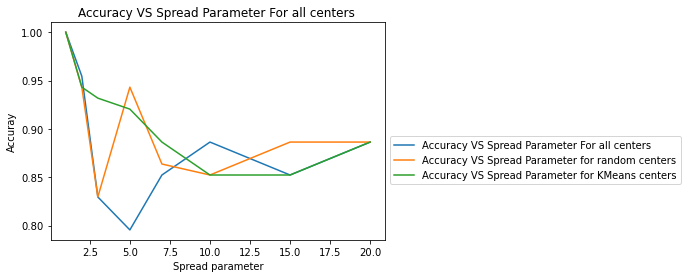

In [11]:
plt.title('Accuracy VS Spread Parameter For all centers ') 
plt.plot(s_values,s_result_all,label="Accuracy VS Spread Parameter For all centers") 
plt.plot(s_values,s_result_random,label="Accuracy VS Spread Parameter for random centers") 
plt.plot(s_values,s_result_kmeans,label="Accuracy VS Spread Parameter for KMeans centers") 
plt.xlabel("Spread parameter") 
plt.ylabel("Accuray") 
plt.legend(bbox_to_anchor=(1, 0.5), loc='upper left', ncol=1)
plt.show()



The above plot gives a comparison between the Accuracies (obtained for different values of S) for the 3 cases under consideration which are
Case 1. All Inputs and Centers for RBF
Case 2. 150 Random Inputs and Centers for RBF
Case 3. 150 Inputs ans Centers of RBF using KMeans Clustering

From the plot, we can notice that as a general trend the value of accuracy has dropped as the value of S increased. The maximum accuracy for all the 3 cases has been obtained for S=1.

Case 1 - When All inputs have been used as centers, the downward trend of accuracy is not consistent, it has maxima and minima at different values of S and the Accuracy drops to minimum as S=5 and reaches a value of below 80%

Case 2 - The trend in Case 2 is similar as in Case 1 which is full of highs and lows but with different values. The minimum accuracy is about 83% for S=3

Case 3 - In this case, we can clearly see the consistent drop in value of Accuracy with increase in S. Also, the accuracy never drops below 85% even at high values of S.

#### Plot between Spread Parameter and Average Loss for all 3 cases

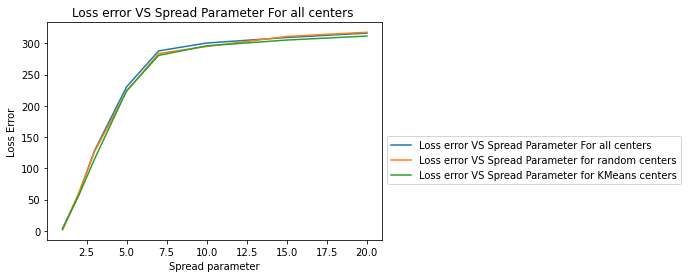

In [12]:
plt.title('Loss error VS Spread Parameter For all centers ') 
plt.plot(s_values,s_avg_loss_all,label="Loss error VS Spread Parameter For all centers") 
plt.plot(s_values,s_avg_loss_random,label="Loss error VS Spread Parameter for random centers") 
plt.plot(s_values,s_avg_loss_kmeans,label="Loss error VS Spread Parameter for KMeans centers") 
plt.xlabel("Spread parameter") 
plt.ylabel("Loss Error") 
plt.legend(bbox_to_anchor=(1, 0.5), loc='upper left', ncol=1)
plt.show()



The above plot gives a comparison between the Average Mean Square Error or Loss (obtained for different values of S) for the 3 cases under consideration which are
Case 1. All Inputs and Centers for RBF
Case 2. 150 Random Inputs and Centers for RBF
Case 3. 150 Inputs ans Centers of RBF using KMeans Clustering

From the plot, we can notice that as the value of accuracy has increases, the value Loss also increased. The minimum loss for all the 3 cases has been obtained for S=1 which is below 5.
As the value of S reaches 20, the value of Loss for all the 3 cases showed significant growth and crossed the value of 300.

1. Spread parameter = 1

    a. Loss in Case 1: 3.58
    
    b. Loss in Case 2: 1.58
    
    c. Loss in Case 3: 2.8
    

2. Spread parameter = 20

    a. Loss in Case 1: 316.2

    b. Loss in Case 2: 317.6

    c. Loss in Case 3: 311.5




#### References

https://pythonmachinelearning.pro/using-neural-networks-for-regression-radial-basis-function-networks/
http://www.rueckstiess.net/research/snippets/show/72d2363e
https://towardsdatascience.com/radial-basis-functions-neural-networks-all-we-need-to-know-9a88cc053448